In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
filepath1=r"/Users/phani/Documents/Sai_Files/02Course_Files/07_Naresh_Data_Science/03FilesgivenbyOmkarSir/Data_Files/Visadataset.csv"
visa_df=pd.read_csv(filepath1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
df=pd.DataFrame(zip(keys,values),
               columns=['Class','Frequency'])
df

,Class,Frequency
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [4]:
cat=visa_df.select_dtypes(include='object').columns.tolist()
num=visa_df.select_dtypes(exclude='object').columns.tolist()
cat,num

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [5]:
# Read the continent column
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- There are total 25480 applicants 
- In that 25480 applicants, 17018 applicants got the visa 
- while 8462 applicants were denied visa
- Also 16861 applicants from Asia
- We want to know how many applicants from Asia got visa certified and how many applicants from Asia were denied

# Q We want to know how many applicants from Asia got visa certified and how many applicants from Asia were denied
- Step-1: select the continent data
- Step-2: continent data == 'Asia' is cond1
- Step-3:  select the case status data
- Step-4: case status data == 'Certified' is cond2
- Step-5: cond= cond1 and cond2
- Step-6: apply main df on cond and get the length

In [7]:
continent_data=visa_df['continent']
cond1= continent_data=='Asia'
case_status_data=visa_df['case_status']
cond2= case_status_data=='Certified'
cond = cond1&cond2
len(visa_df[cond])

11012

In [8]:

cond1

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [9]:
visa_df['continent']
con1 = visa_df['continent']=='Asia'
visa_df['case_status']
con2 = visa_df['case_status']=='Certified'
con = con1 & con2
len(visa_df[con])  

11012

# Do above for all 6 continents

In [10]:
continents_list=visa_df['continent'].unique()
continents_list

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [11]:
for i in visa_df['continent'].unique():
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con = con1 & con2
    print(f'Certified applicants from {i} continent are {len(visa_df[con])}')

Certified applicants from Asia continent are 11012
Certified applicants from Africa continent are 397
Certified applicants from North America continent are 2037
Certified applicants from Europe continent are 2957
Certified applicants from South America continent are 493
Certified applicants from Oceania continent are 122


# Do above for both certified and denisd and create a dataframe from both these
- Take two empty list


In [12]:
certified_count_list=[]
denied_count_list=[]
for i in visa_df['continent'].unique():
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    certified_count_list.append(len(visa_df[con1 & con2]))
    denied_count_list.append(len(visa_df[con1 & con3]))

Certified_Denied_df=pd.DataFrame(zip(certified_count_list,denied_count_list),index=visa_df['continent'].unique(),columns=['Certified','Denied'])
Certified_Denied_df

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [13]:
certified_count_list=[]
denied_count_list=[]
for i in visa_df['continent'].unique():
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    certified_count_list.append(len(visa_df[con1 & con2]))
    denied_count_list.append(len(visa_df[con1 & con3]))

cols=visa_df['case_status'].unique()
print(cols)
Certified_Denied_df=pd.DataFrame(zip(certified_count_list,denied_count_list),index=visa_df['continent'].unique(),columns=['Certified','Denied'])
Certified_Denied_df
# issue of unique() funciton not giving alphabetical order. Use sorted

['Denied' 'Certified']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [14]:
certified_count_list=[]
denied_count_list=[]
for i in visa_df['continent'].unique():
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    certified_count_list.append(len(visa_df[con1 & con2]))
    denied_count_list.append(len(visa_df[con1 & con3]))

cols=sorted(visa_df['case_status'].unique())
print(cols)
Certified_Denied_df=pd.DataFrame(zip(certified_count_list,denied_count_list),index=visa_df['continent'].unique(),columns=cols)
Certified_Denied_df
# issue of unique() funciton not giving alphabetical order. Use sorted

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


# Shortcut for above
## cross tab

In [15]:
# pd.crosstab(<indexcolumn>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [16]:
# pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r2=pd.crosstab(col2,col1)
r2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

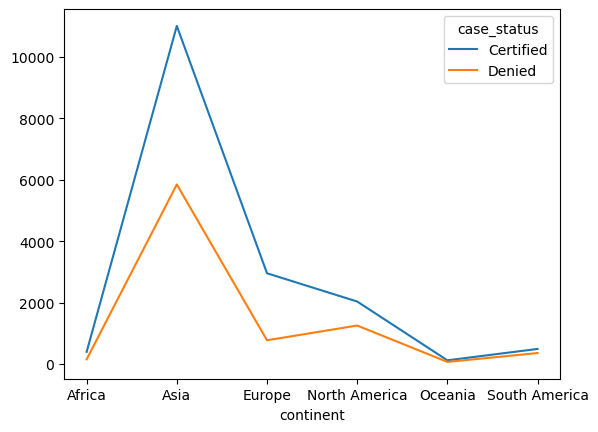

In [17]:
r1.plot()

<Axes: xlabel='case_status'>

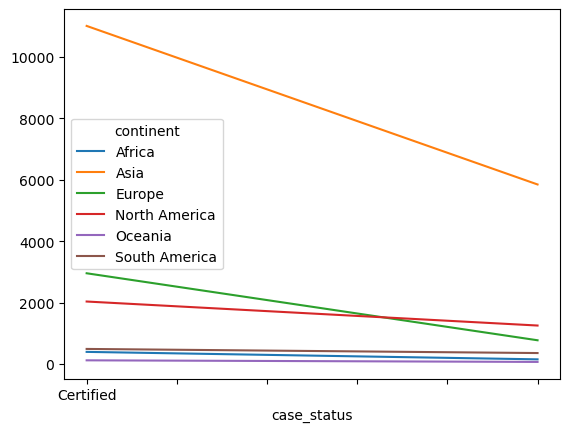

In [18]:
r2.plot()

<Axes: xlabel='continent'>

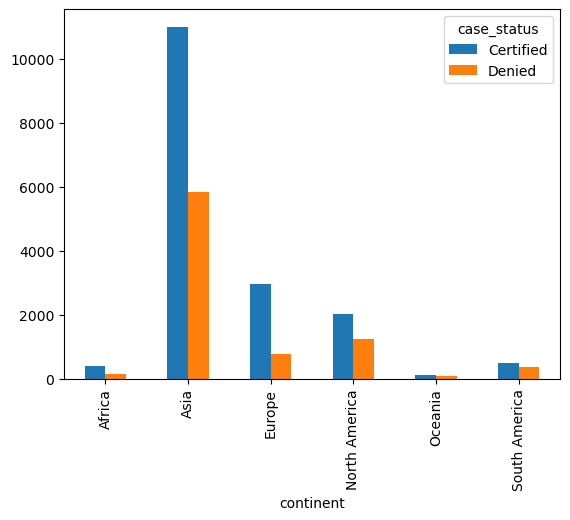

In [19]:
r1.plot(kind='bar')

<Axes: xlabel='case_status'>

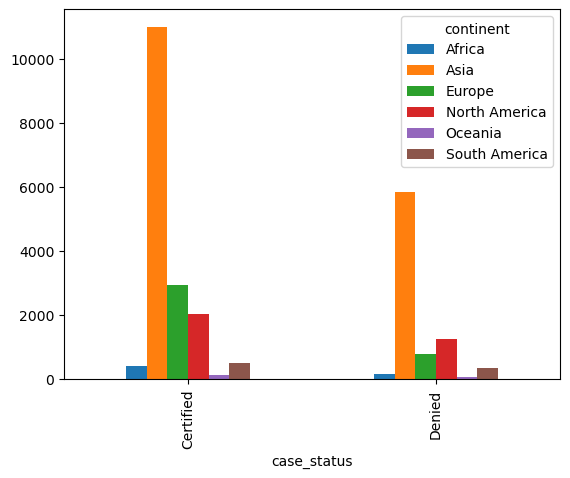

In [20]:
r2.plot(kind='bar')

# Case status-continent-education of employee analysis
- From asia there are 16k applicants appied for visa
    - in that 11k+ people got certified
        - in that 11k people, there are different educational background
     
- We want this information

In [21]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
r1=pd.crosstab(col3,cols)
r1

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='education_of_employee'>

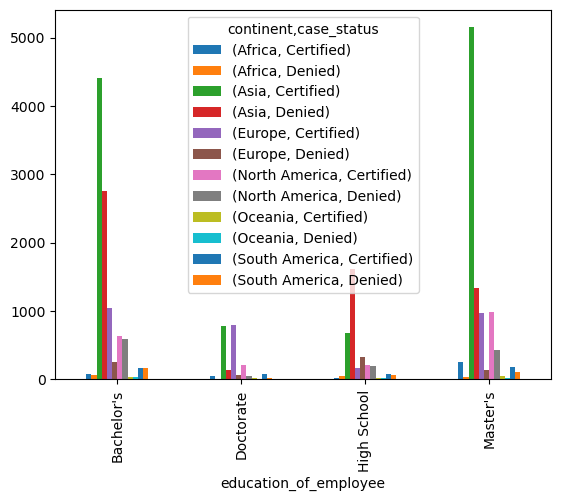

In [22]:
r1.plot(kind='bar')

In [23]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col1]
pd.crosstab(col3,cols)

case_status           Certified                                     \
continent                Africa  Asia Europe North America Oceania   
education_of_employee                                                
Bachelor's                   81  4407   1040           641      38   
Doctorate                    43   780    788           207      19   
High School                  23   676    162           210      19   
Master's                    250  5149    967           979      46   

case_status                         Denied                                     \
continent             South America Africa  Asia Europe North America Oceania   
education_of_employee                                                           
Bachelor's                      160     62  2761    259           584      28   
Doctorate                        75     11   143     58            51       3   
High School                      74     43  1614    328           191      17   
Master's                        184     38  1331    130           429      22   

case_status                          
continent             South America  
education_of_employee                
Bachelor's                      173  
Doctorate                        14  
High School                      63  
Master's                        109

In [24]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r1=pd.crosstab(col1,cols)
r1

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [25]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col3,col2]
r2=pd.crosstab(col1,cols)
r2

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [26]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col3,col1]
pd.crosstab(col2,cols)

education_of_employee Bachelor's                                     \
continent                 Africa  Asia Europe North America Oceania   
case_status                                                           
Certified                     81  4407   1040           641      38   
Denied                        62  2761    259           584      28   

education_of_employee               Doctorate                            ...  \
continent             South America    Africa Asia Europe North America  ...   
case_status                                                              ...   
Certified                       160        43  780    788           207  ...   
Denied                          173        11  143     58            51  ...   

education_of_employee High School                                      \
continent                  Europe North America Oceania South America   
case_status                                                             
Certified                     162           210      19            74   
Denied                        328           191      17            63   

education_of_employee Master's                                     \
continent               Africa  Asia Europe North America Oceania   
case_status                                                         
Certified                  250  5149    967           979      46   
Denied                      38  1331    130           429      22   

education_of_employee                
continent             South America  
case_status                          
Certified                       184  
Denied                          109  

[2 rows x 24 columns]

In [27]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col3]
pd.crosstab(col2,cols)

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='continent'>

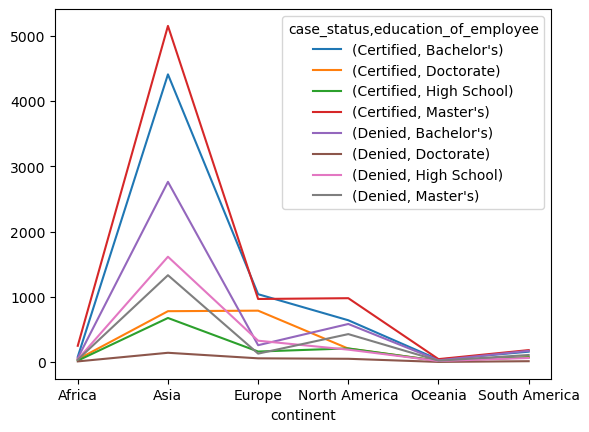

In [28]:
r1.plot()

<Axes: xlabel='continent'>

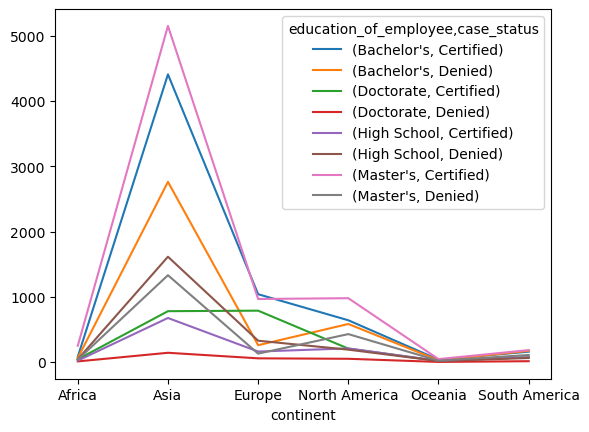

In [29]:
r2.plot()

# group by

In [30]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [31]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [32]:
visa_df.groupby('education_of_employee')
# grouby will organise data based on the label provided

In [33]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [34]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [35]:
visa_df.groupby('education_of_employee').size()
# gives answer similar to value_counts()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [36]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [37]:
# Based on groupby, select another column
visa_df.groupby('education_of_employee')['prevailing_wage']

In [38]:
# Based on groupby, select another column and find it's mean
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [39]:
visa_df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [40]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.7400,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified


In [41]:
# same as above but without using groupby
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [42]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [43]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [44]:
con2=visa_df['case_status']=='Denied'
new_df=visa_df[con2]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [45]:
# I want to know the min wage of all people
visa_df['prevailing_wage'].min()

2.1367

In [46]:
# I want to know the min wage of Asia people
visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [47]:
# I want to know the min wage of Asia people usign groupby
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

# 10/12/2025


- we have seen three variables **continent,case status and education of employee**
- we also done similar analysis using group by
- Only categorical column analysis comleted
- only numerical analysis completed
- Also bivariate and multivariate analysis completed
- Now we need to perform two numerical colun anslys
    - this will give relation between two columns which are numerical in nature
    - so we can perform correlation. matrix to get the relationship
    - also we need to perform scatter plots to visualiz the relation

# plt.scatter()

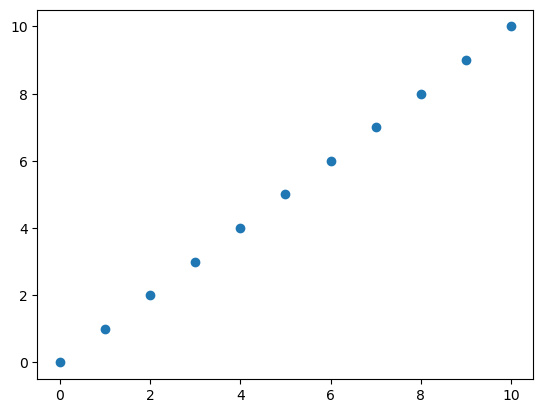

In [51]:
x=range(0,11)
y=range(0,11)
x,y
plt.scatter(x,y)
plt.show()

ValueError: x and y must be the same size

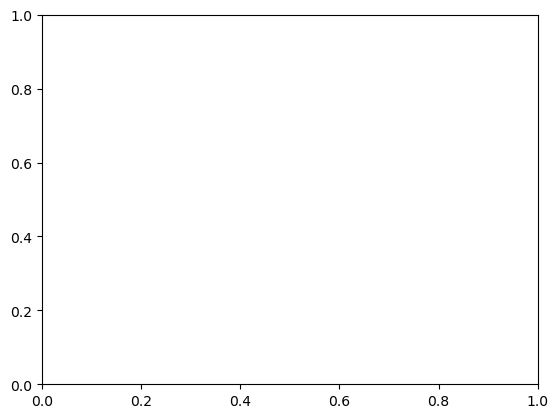

In [54]:
x=range(0,11) # 0 to 10
y=range(10,0,-1) # 10 to 2
x,y
plt.scatter(x,y)
plt.show()

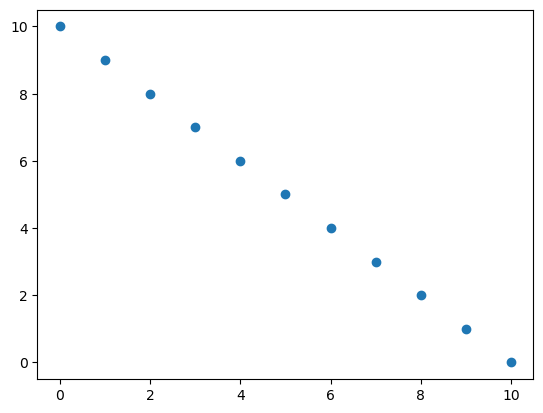

In [56]:
x=range(0,11) # 0 to 10
y=range(10,-1,-1) # 10 to 0
x,y
plt.scatter(x,y)
plt.show()

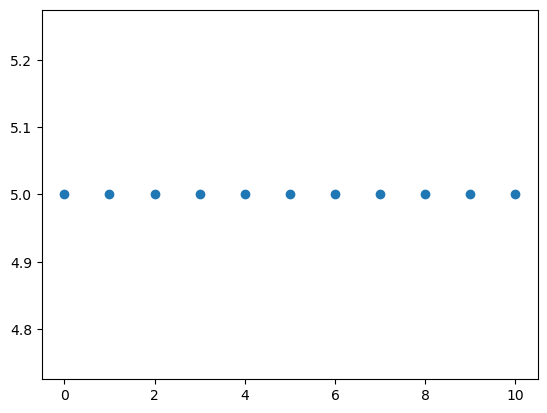

In [57]:
x=range(0,11) # 0 to 10
y=[5 for i in range(0,11)] 
x,y
plt.scatter(x,y)
plt.show()

In [58]:
cat

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [59]:
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [60]:
visa_df.corr()
# ValueError: could not convert string to float: 'EZYV01'

ValueError: could not convert string to float: 'EZYV01'

In [61]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [62]:
# write in notes about correlationm matrix

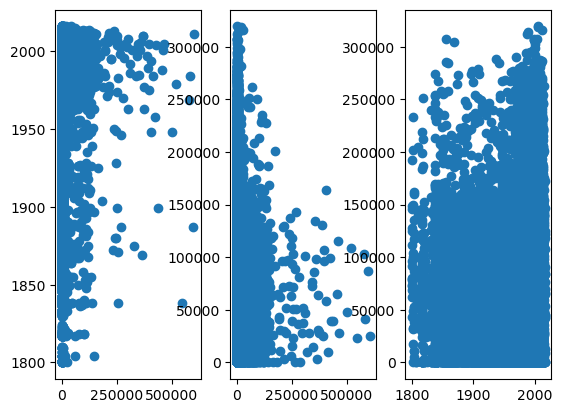

In [64]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.subplot(1,3,1)
plt.scatter(col1,col2)
plt.subplot(1,3,2)
plt.scatter(col1,col3)
plt.subplot(1,3,3)
plt.scatter(col2,col3)

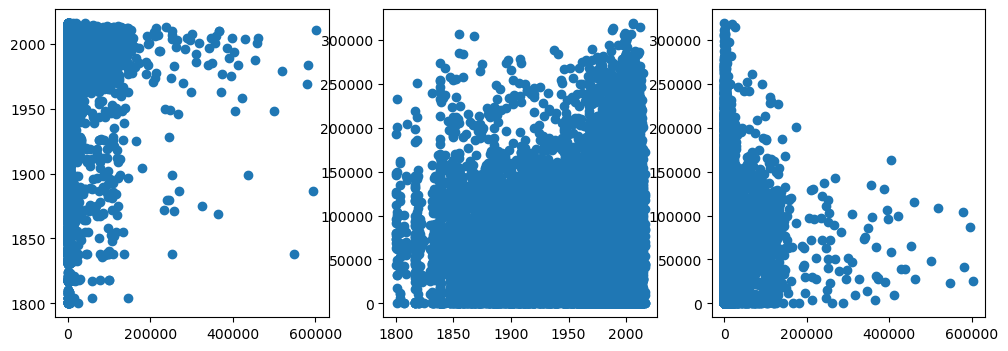

In [69]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)

plt.subplot(1,3,2).scatter(col2,col3)

plt.subplot(1,3,3).scatter(col1,col3)


In [70]:
# wine quality dataset
# load the dataset
# perform the correlation
path=r"/Users/phani/Documents/Sai_Files/02Course_Files/07_Naresh_Data_Science/03FilesgivenbyOmkarSir/Data_Files/winequality_red.csv"
winequality_df=pd.read_csv(path)
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [73]:
categorical_cols=winequality_df.select_dtypes(include='object')
numerical_cols=winequality_df.select_dtypes(exclude='object')
numerical_cols

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [72]:
winequality_df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


AttributeError: 'PathCollection' object has no attribute 'title'

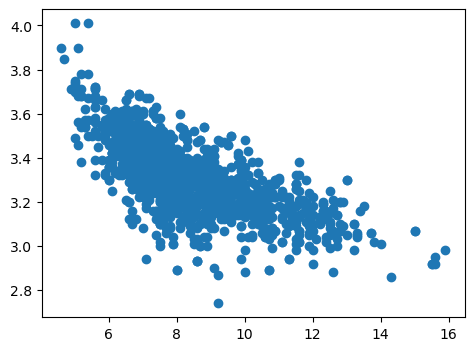

In [78]:
col1=winequality_df['fixed acidity']
col9=winequality_df['pH']
plt.figure(figsize=(12,4))
# negative correlation of -0.6829
plt.subplot(1,2,1).scatter(col1,col9)

# lowest correlation of 0.001918
col2=winequality_df['volatile acidity']
col4=winequality_df['residual sugar']
plt.subplot(1,2,2).scatter(col2,col4)
plt.title('-0.6829 correlation b/w col1,col9 and 0.001918 correlation b/w col2,col4')

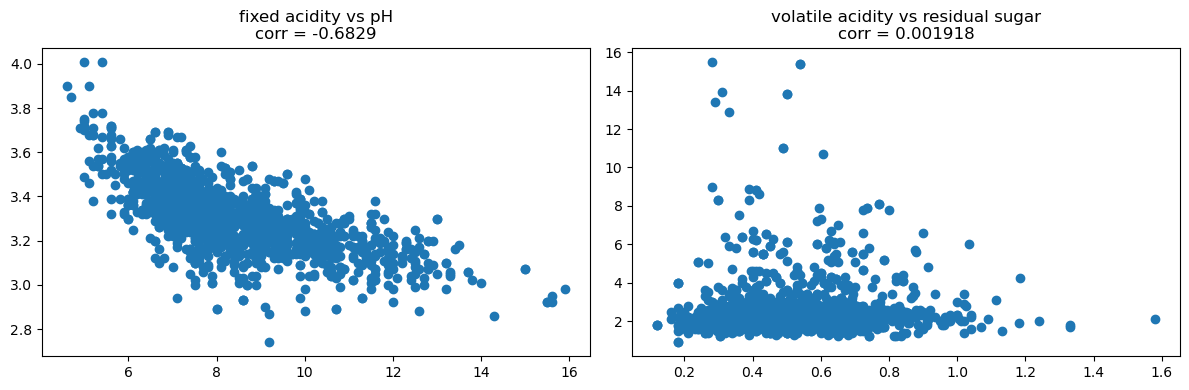

In [79]:
col1 = winequality_df['fixed acidity']
col9 = winequality_df['pH']
col2 = winequality_df['volatile acidity']
col4 = winequality_df['residual sugar']

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(col1, col9)
ax1.set_title('fixed acidity vs pH\ncorr = -0.6829')

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(col2, col4)
ax2.set_title('volatile acidity vs residual sugar\ncorr = 0.001918')

plt.tight_layout()
plt.show()


# Heatmaps
- in above, it took lot of time to find highest and lowest value
- Any matrix values we can visualize using a heat map
- heat map will provide colours for different values
- heat map also provides colour bar which indicates the clor and its value
- For eg, the values ranges from 0.8 to 1 display as **blue color**
- So, immediately we can sense blue color means highest values which is 0.8 to 1
- heat map available in sea born

In [80]:
import seaborn as sns

<Axes: >

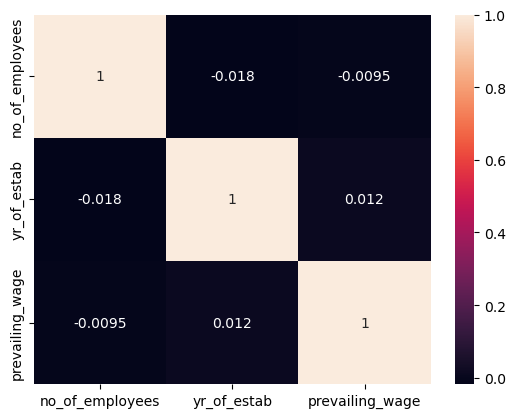

In [84]:
sns.heatmap(visa_df.corr(numeric_only=True),annot=True)

<Axes: >

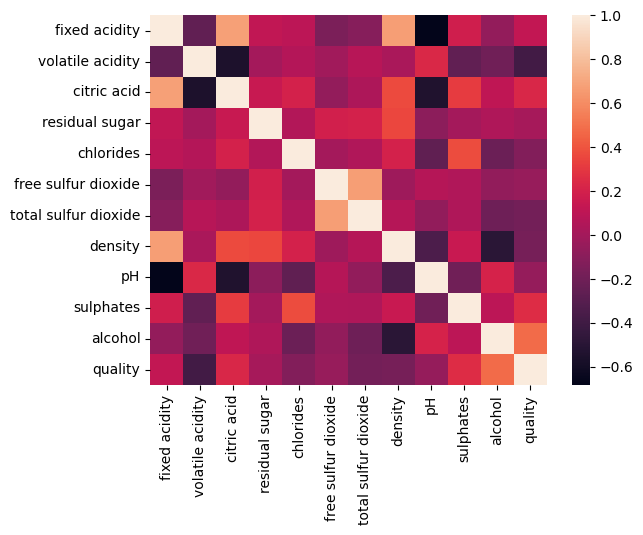

In [83]:
sns.heatmap(winequality_df.corr(numeric_only=True))

<Axes: >

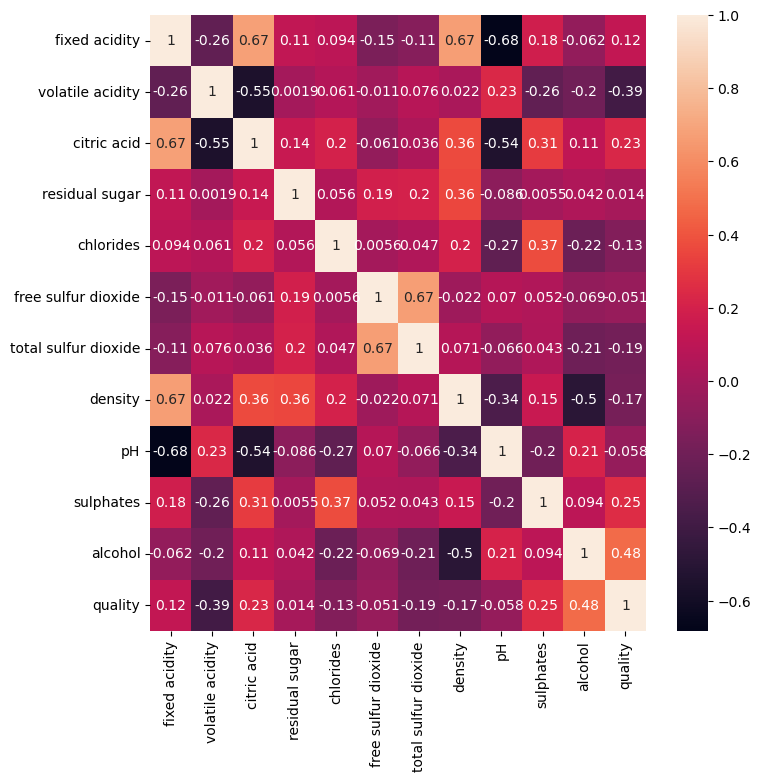

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(winequality_df.corr(numeric_only=True),annot=True)

In [88]:
wine_corr=winequality_df.corr(numeric_only=True)

In [90]:
winequality_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

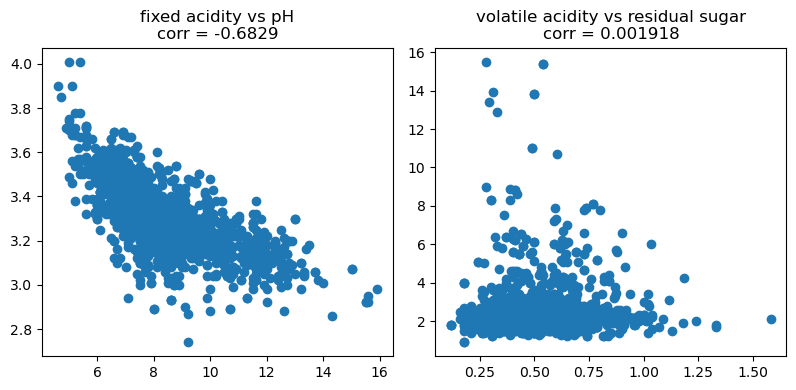

In [93]:
col1 = winequality_df['fixed acidity']
col9 = winequality_df['pH']
col2 = winequality_df['volatile acidity']
col4 = winequality_df['residual sugar']

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
ax1.scatter(col1, col9)
ax1.set_title('fixed acidity vs pH\ncorr = -0.6829')

ax2 = plt.subplot(1, 3, 2)
ax2.scatter(col2, col4)
ax2.set_title('volatile acidity vs residual sugar\ncorr = 0.001918')

plt.tight_layout()
plt.show()